# Part 1 – CLUSTER ANALYSIS

In [1]:
import os
import numpy as np
import pandas as pd
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
imdb_data = pd.read_csv("imdb_dataset.csv")
imdb_data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
imdb_data.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [5]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             651 non-null    object 
 1   title_type        651 non-null    object 
 2   genre             651 non-null    object 
 3   runtime           650 non-null    float64
 4   mpaa_rating       651 non-null    object 
 5   studio            643 non-null    object 
 6   thtr_rel_year     651 non-null    int64  
 7   thtr_rel_month    651 non-null    int64  
 8   thtr_rel_day      651 non-null    int64  
 9   dvd_rel_year      643 non-null    float64
 10  dvd_rel_month     643 non-null    float64
 11  dvd_rel_day       643 non-null    float64
 12  imdb_rating       651 non-null    float64
 13  imdb_num_votes    651 non-null    int64  
 14  critics_rating    651 non-null    object 
 15  critics_score     651 non-null    int64  
 16  audience_rating   651 non-null    object 
 1

In [6]:
imdb_data.describe()

,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
count,650.000000,651.000000,651.000000,651.000000,643.000000,643.000000,643.000000,651.000000,651.000000,651.000000,651.000000
mean,105.821538,1997.941628,6.740399,14.416283,2004.427683,6.332815,15.007776,6.493088,57532.983103,57.688172,62.362519
std,19.445047,10.974501,3.554223,8.861167,4.643588,3.378228,8.867400,1.084747,112124.386910,28.402971,20.222624
min,39.000000,1970.000000,1.000000,1.000000,1991.000000,1.000000,1.000000,1.900000,180.000000,1.000000,11.000000
25%,92.000000,1990.000000,4.000000,7.000000,2001.000000,3.000000,7.000000,5.900000,4545.500000,33.000000,46.000000
50%,103.000000,2000.000000,7.000000,15.000000,2004.000000,6.000000,15.000000,6.600000,15116.000000,61.000000,65.000000
75%,115.750000,2007.000000,10.000000,21.000000,2008.000000,9.000000,23.000000,7.300000,58300.500000,83.000000,80.000000
max,267.000000,2014.000000,12.000000,31.000000,2015.000000,12.000000,31.000000,9.000000,893008.000000,100.000000,97.000000


### Check for missing data

In [7]:
imdb_data.isna().sum()

title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               8
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         8
dvd_rel_month        8
dvd_rel_day          8
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              13
actor5              15
imdb_url             0
rt_url               0
dtype: int64

In [8]:
imdb_data.head(5)

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


### Logical Partioning of relevent columns

In [9]:
imdb_data.shape

(651, 32)

### Preprocess dataset

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting relevant columns
numerical_cols = ['runtime', 'imdb_rating', 'imdb_num_votes', 'critics_score', 'audience_score']
categorical_cols = ['genre', 'mpaa_rating', 'critics_rating', 'audience_rating', 
                    'best_pic_nom', 'best_pic_win', 'best_actor_win', 
                    'best_actress_win', 'best_dir_win', 'top200_box']

# Keeping only the selected columns
selected_data = imdb_data[numerical_cols + categorical_cols]

# Preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Applying the preprocessing pipeline to the data
prepared_data = preprocessor.fit_transform(selected_data)

prepared_data.shape  


(651, 39)

### Apply Kmeans clustering

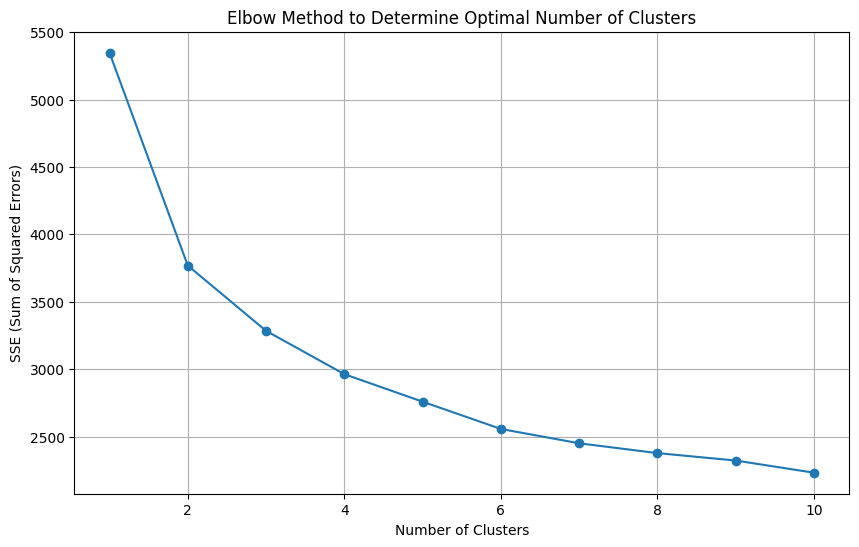

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
sse = []
range_of_clusters = range(1, 11)  # Testing for 1 to 10 clusters

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(prepared_data)
    sse.append(kmeans.inertia_)

# Plotting the SSE vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, sse, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid(True)
plt.show()


In [12]:
diffs = np.diff(sse) 
diffs_ratio = diffs[:-1] / diffs[1:]  
optimal_k = range_of_clusters[np.argmax(diffs_ratio) + 1]  

print("Optimal value of k:", optimal_k)

Optimal value of k: 2


## clauster propoties with Kmean with 2

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(prepared_data)

# Step 2: Retrieve cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

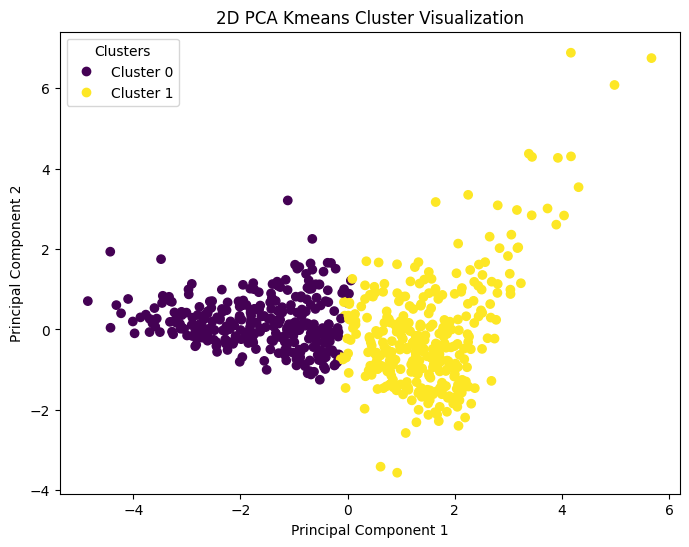

In [18]:
from sklearn.decomposition import PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(prepared_data)

# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.legend(handles=scatter.legend_elements()[0], title="Clusters", labels=[f'Cluster {i}' for i in range(kmeans.n_clusters)])

plt.title('2D PCA Kmeans Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('Kmeans_scale_vis.png', dpi=300, bbox_inches='tight')
plt.show()


## Hierarchical clustering

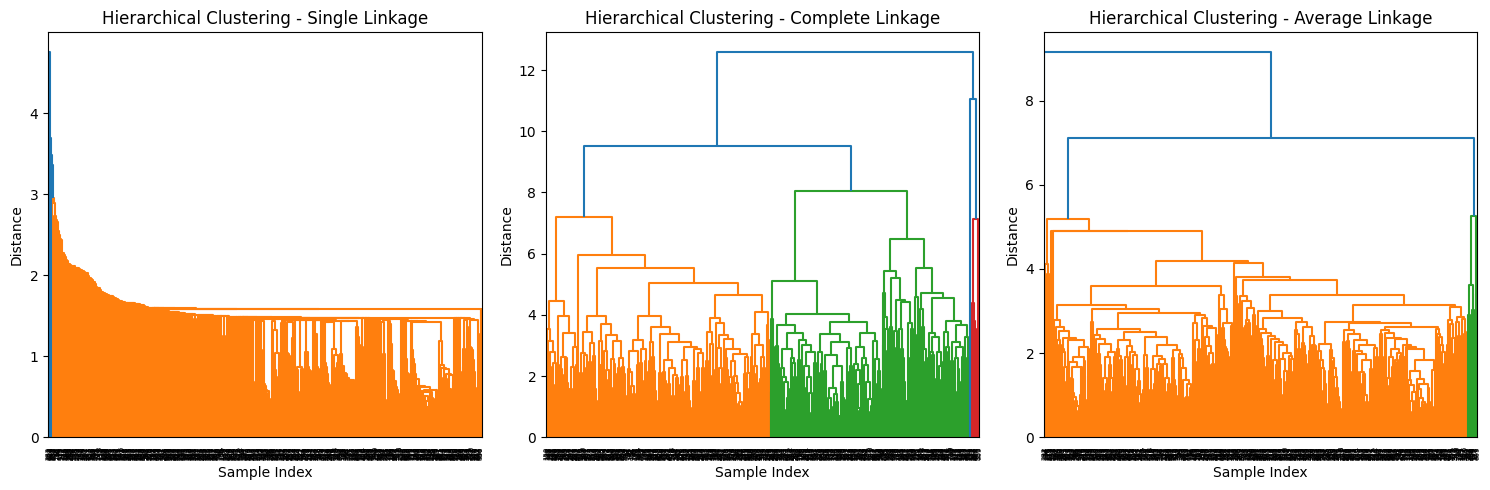

In [120]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Applying Hierarchical Clustering with different linkage methods
linkage_methods = ['single', 'complete', 'average']
plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods):
    plt.subplot(1, 3, i + 1)
    Z = linkage(prepared_data, method=method)
    dendrogram(Z)
    plt.title(f'Hierarchical Clustering - {method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.tight_layout()

plt.show()


### With upto 5 level

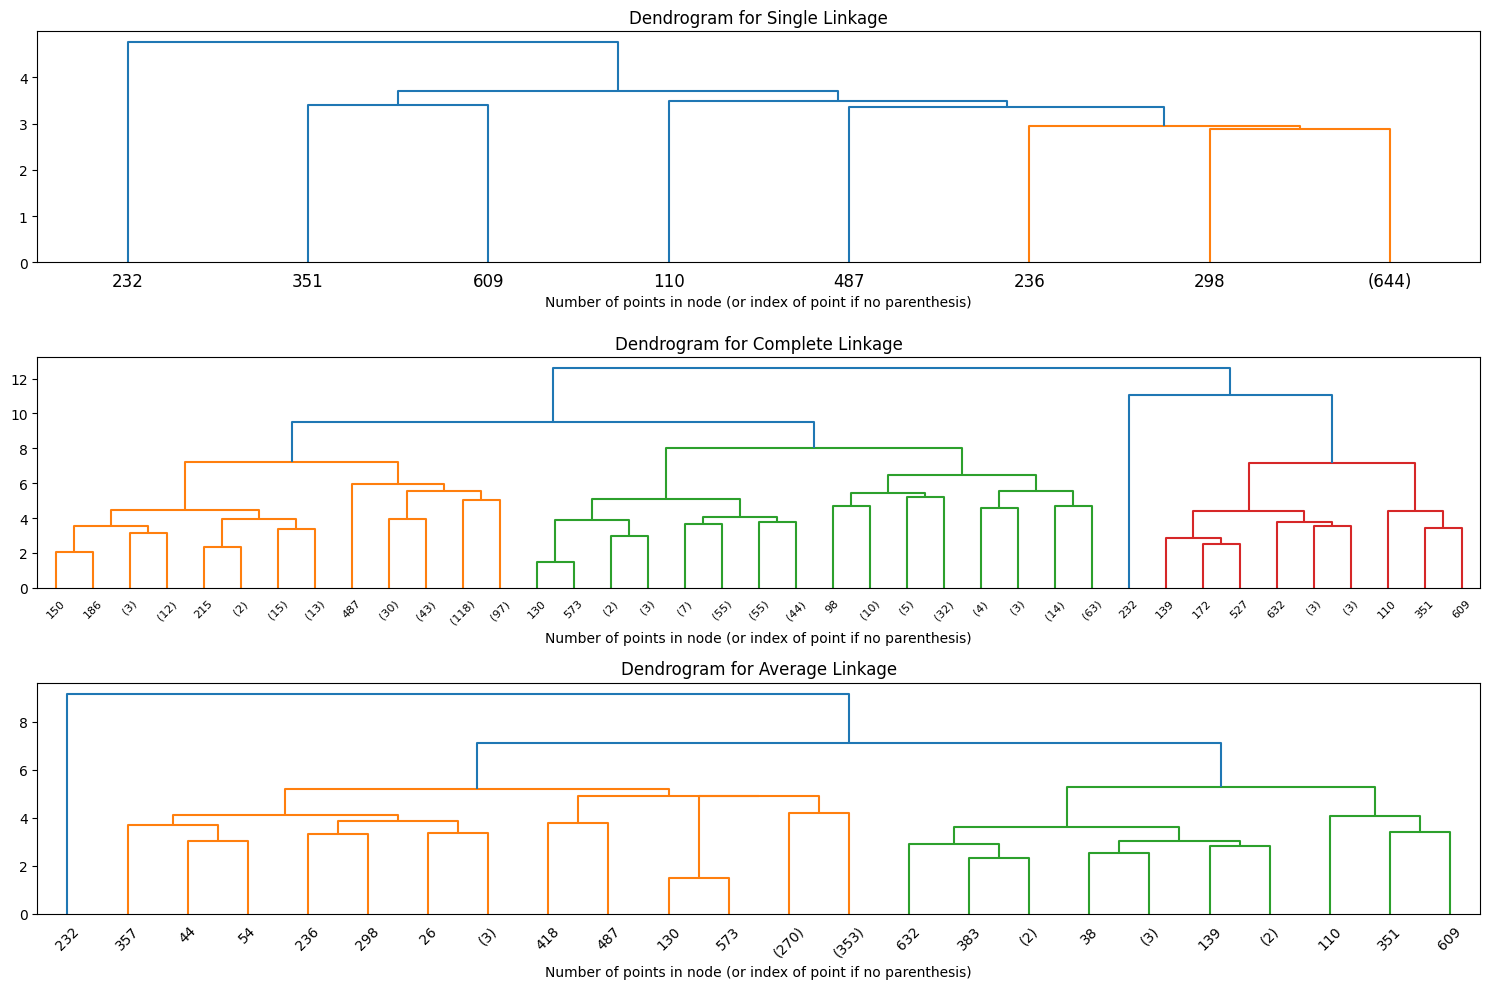

In [27]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define linkage methods
linkage_methods = ['single', 'complete', 'average']

# Create subplots for the dendrograms
fig, axes = plt.subplots(len(linkage_methods), 1, figsize=(15, 10))

# Perform hierarchical clustering and plot dendrograms for each linkage method
for i, method in enumerate(linkage_methods):
    # Compute the linkage matrix
    linked = linkage(prepared_data, method=method)

    # Plot dendrogram
    dendrogram(linked, ax=axes[i], truncate_mode='level', p=5)
    axes[i].set_title(f'Dendrogram for {method.capitalize()} Linkage')
    axes[i].set_xlabel('Number of points in node (or index of point if no parenthesis)')

plt.tight_layout()
plt.show()


# Part 2 – TEXT MINING

### Count Vectorization

This process involves converting the text data into a matrix of token counts. Each row in the matrix represents a document from the dataset, and each column represents a unique word in the dataset. The value in each cell is the frequency of the word in the corresponding document.

### TF-IDF Vectorization

TF-IDF stands for Term Frequency-Inverse Document Frequency. This process involves converting the text data into a matrix where each row represents a document, and each column represents a unique word. The value in each cell is the TF-IDF score of the word in the corresponding document. TF-IDF increases the importance of words that are unique to a document and decreases the importance of words that are common across multiple documents.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [29]:
text_dataset = [ 'Now for manners use has company believe parlors.',
'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.',
'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.', 'Principle oh explained excellent do my suspected conveying in.',
'Excellent you did therefore perfectly supposing described. ',
'Its had resolving otherwise she contented therefore.',
'Afford relied warmth out sir hearts sister use garden.',
'Men day warmth formed admire former simple.',
'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ' , 'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy. ']

In [117]:
# Count Vectorization
count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(text_dataset)
feature_names = count_vectorizer.get_feature_names_out()

pd.DataFrame(count_vector.todense(),columns=feature_names)

,admire,afford,agreed,allowance,am,an,and,announcing,as,believe,company,comparison,contented,continue,conveying,day,declared,described,devonshire,did,direction,dissimilar,do,easy,excellent,excuse,exercise,explained,for,formed,former,garden,had,has,hastened,he,head,hearts,humanity,in,is,its,just,least,literature,manners,men,most,my,necessary,no,nor,now,of,oh,on,otherwise,out,parish,parlors,party,perfectly,principle,property,put,relied,resolving,result,room,say,set,she,simple,sir,sister,so,such,supplied,supposing,suspected,sweetness,terminated,therefore,to,travelling,uncommonly,use,vicinity,warmth,while,who,wrote,yet,you
0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
2,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [119]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(text_dataset)

feature_names = tfidf_vectorizer.get_feature_names_out()

pd.DataFrame(tfidf_vector.todense(),columns=feature_names)


,admire,afford,agreed,allowance,am,an,and,announcing,as,believe,company,comparison,contented,continue,conveying,day,declared,described,devonshire,did,direction,dissimilar,do,easy,excellent,excuse,exercise,explained,for,formed,former,garden,had,has,hastened,he,head,hearts,humanity,in,is,its,just,least,literature,manners,men,most,my,necessary,no,nor,now,of,oh,on,otherwise,out,parish,parlors,party,perfectly,principle,property,put,relied,resolving,result,room,say,set,she,simple,sir,sister,so,such,supplied,supposing,suspected,sweetness,terminated,therefore,to,travelling,uncommonly,use,vicinity,warmth,while,who,wrote,yet,you
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363862,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.215139,0.000000,0.253077,0.000000,0.000000,0.000000,0.000000,0.000000,0.215139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215139,0.000000,0.000000,0.000000,0.000000,0.000000,0.253077,0.000000,0.000000,0.000000,0.215139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253077,0.000000,0.000000,0.253077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253077,0.000000,0.000000,0.000000,0.215139,0.000000,0.000000,0.253077,0.000000,0.253077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.253077,0.253077,0.253077,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.285414,0.000000,0.000000,0.285414,0.285414,0.242628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285414,0.000000,0.000000,0.000000,0.000000,0.000000,0.285414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285414,0.000000,0.000000,0.285414,0.285414,0.285414,0.212271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338591,0.000000,0.287833,0.000000,0.000000,0.338591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338591,0.000000,0.000000,0.000000,0.000000,0.000000,0.338591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [43]:
count_vector_dense = count_vector.todense()
tfidf_vector_dense = tfidf_vector.todense()

In [44]:
# Displaying the first 5 rows of each
print("Count Vector (first 5 rows):")
print(count_vector_dense[:5])
print("\nTF-IDF Vector (first 5 rows):")
print(tfidf_vector_dense[:5])



Count Vector (first 5 rows):
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0

### Usage of TF-IDF


* In a large text corpus, TF-IDF can identify the most relevant words in each document and highlighting keywords that are unique to that document.

* It can also use as information retrieval systems, such as search engines. When a user inputs a query, the system can rank documents by the TF-IDF scores of the query terms to retrieve the most relevant documents.

* In machine learning, TF-IDF is used as a feature extraction technique to convert text data into a format that algorithms can work with. By representing documents through their TF-IDF vectors, it becomes possible to apply classification or clustering algorithms, like KMeans or hierarchical clustering, to group or classify documents based on their content.

* By considering the inverse document frequency, TF-IDF naturally filters out common words that appear in many documents and are less informative (like 'the', 'is', 'and', etc.) or stopwords. This helps in focusing on words that are more unique and descriptive of each document.

### Part 3: Artificial Neural Network (ANN)

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [92]:
df = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")

In [93]:
df.shape

(500, 9)

In [94]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [96]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Data Preprocessing

In [97]:
df = df.drop(['Serial No.'], axis=1)

In [98]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [99]:
scaler = StandardScaler()
feature_columns = df.columns.difference(['Chance of Admit ', "Research"])
df[feature_columns] = scaler.fit_transform(df[feature_columns])

In [100]:
# Modify target variable for binary classification
threshold = 0.5
df['Chance of Admit '] = (df['Chance of Admit '] > threshold).astype(int)

In [101]:
X = df.drop(['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print(f"Number of training examples: {X_train.shape[0]}")
print(f"Number of testing examples: {X_test.shape[0]}")

Number of training examples: 400
Number of testing examples: 100


In [103]:
# ANN Model
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

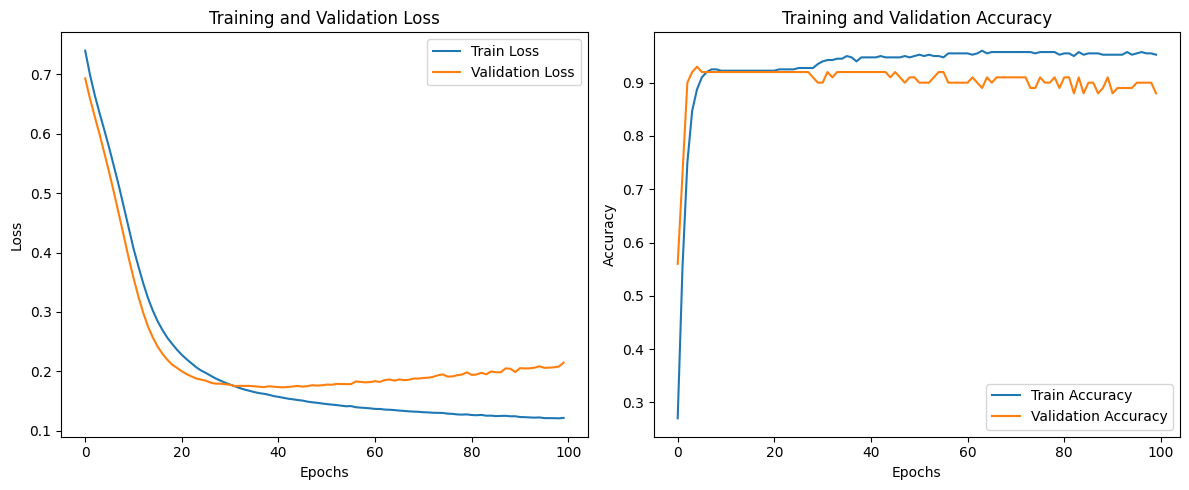

In [105]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

# Plot for loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [106]:
# Evaluate the model
pred = model.predict(X_test)

# Convert probabilities to binary predictions
pred = (pred > 0.5).astype(int)

4/4 [==============================] - 0s 3ms/step


In [107]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, pred)))

Accuracy on test data is 0.88


In [108]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         8
           1       0.93      0.93      0.93        92

    accuracy                           0.88       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.88      0.88      0.88       100



### Confusion matrix

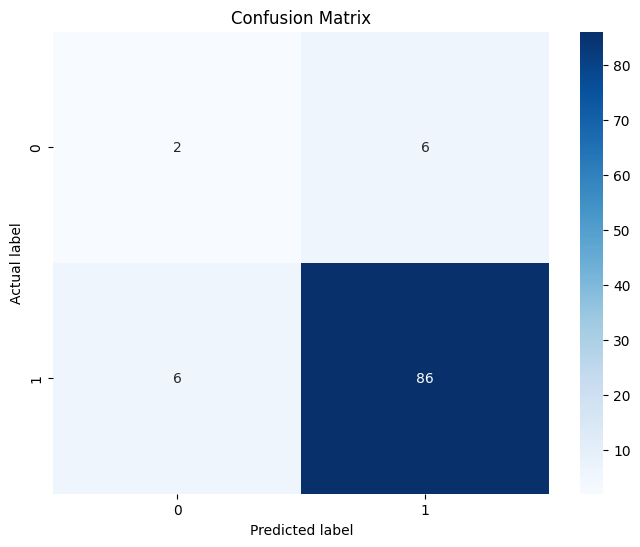

In [112]:
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
